# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [188]:
# mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
%matplotlib inline
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [190]:
# reading data

df = pd.read_csv('/content/drive/MyDrive/capston project/Regression/bike_share/SeoulBikeData.csv',encoding= 'unicode_escape')

#Overview of data

In [191]:
# head of data

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [192]:
# tail of data

df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [193]:
# description of data

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [194]:
# columns in our dataset

df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#Performing EDA

In [196]:
# checking for null values

df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Above result says that there are no null values in the data

In [197]:
# finding the type of data of 'Date' column

type(df['Date'][0])

str

In [198]:
# converting string format of 'Date' column into date-time format

df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-198-b7fc722c5732>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [199]:
# all the seasons present in data

df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [200]:
# creating a column containing the year from a particular date

year = []
for i in range(len(df['Date'])):
  year.append(df['Date'][i].year)
df['year'] = year  

In [201]:
# creating a column containing the month number from a particular date

months = []
for i in range(len(df['Date'])):
  months.append(df['Date'][i].month)
df['month'] = months  

In [202]:
# creating a dataframe containing the sum of all column values pertaining to differant seasons

df_s = df.groupby('Seasons').sum()

<ipython-input-202-8a2f0c6b5c83>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_s = df.groupby('Seasons').sum()


In [203]:
df_s

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month
Seasons,,,,,,,,,,,,
Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,18816
Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,10992
Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15048
Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,12312


array([<Axes: ylabel='Rented Bike Count'>], dtype=object)

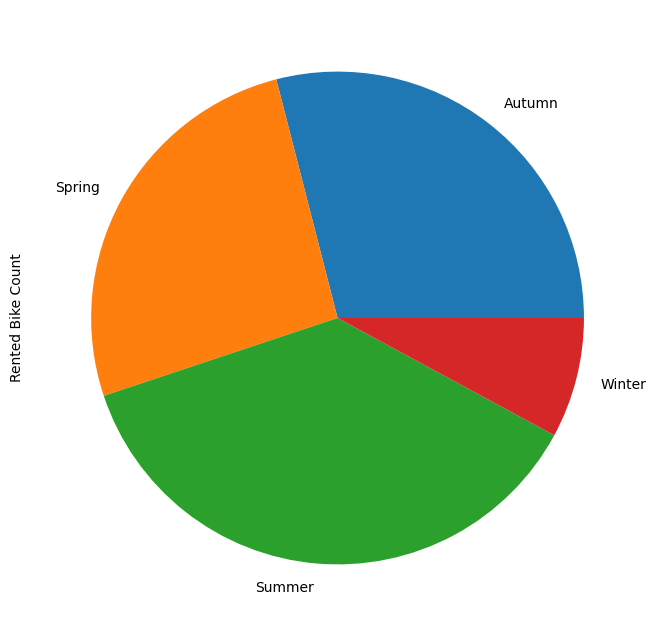

In [204]:
# creating a pie chart of bike count in differant seasons

df_s['Rented Bike Count'].plot(kind='pie', subplots=True, figsize=(8, 8))

conclusions from above pie chart:
1. most bikes have been rented in the summer season.
2. least bike rent count is in winter season.
3. autumn and spring seasons have almost equal amounts of bike rent count.

In [205]:
# creating a dataframe which contains rented bike counts in each seasaon

df_seasons = df.groupby('Seasons').sum()['Rented Bike Count']

<ipython-input-205-a15d9af52b3f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_seasons = df.groupby('Seasons').sum()['Rented Bike Count']


In [206]:
df_seasons.head()

Seasons
Autumn    1790002
Spring    1611909
Summer    2283234
Winter     487169
Name: Rented Bike Count, dtype: int64

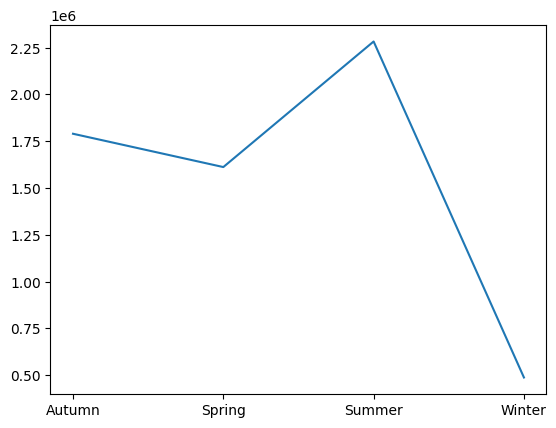

In [207]:
# Line plot showing the differance in rent rate in differant seasons 

plt.plot(df_seasons)
plt.show()

In [208]:
# creating a series which shows total number of bikes rented in each year

df_year = df.groupby('year').sum()['Rented Bike Count']

<ipython-input-208-334103656d7d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df.groupby('year').sum()['Rented Bike Count']


In [209]:
df_year

year
2017     185330
2018    5986984
Name: Rented Bike Count, dtype: int64

<Axes: xlabel='year'>

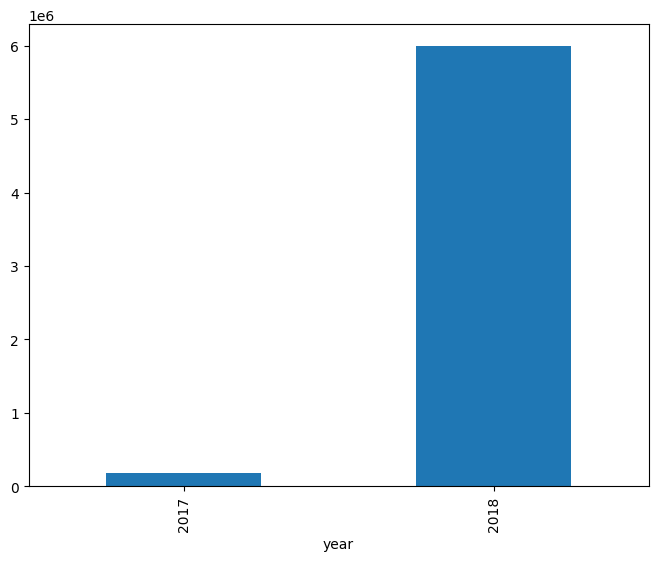

In [210]:
fig, ax = plt.subplots(figsize=(8,6))
df_year.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented in the year 2018.

In [211]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = df.groupby('Holiday').sum()['Rented Bike Count']

<ipython-input-211-c6bd9bf1e816>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hol = df.groupby('Holiday').sum()['Rented Bike Count']


In [212]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

<Axes: xlabel='Holiday'>

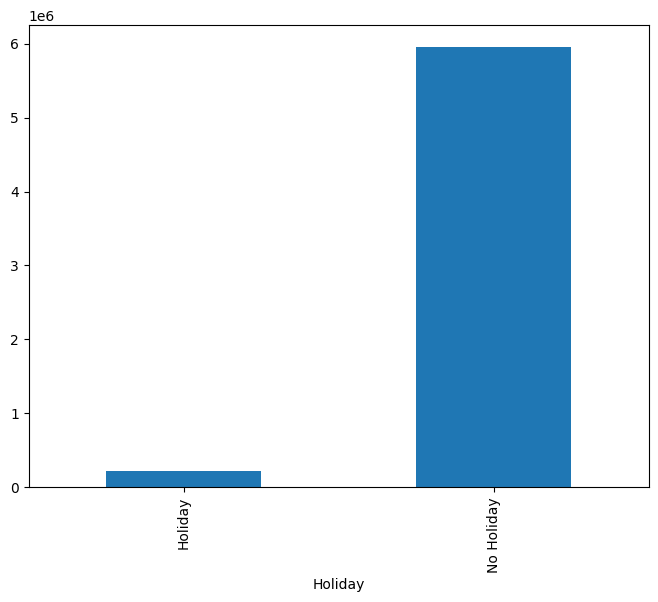

In [213]:
fig, ax = plt.subplots(figsize=(8,6))
df_hol.plot(kind='bar', ax=ax)

Above plot shows that most of the bikes have been rented on working days.

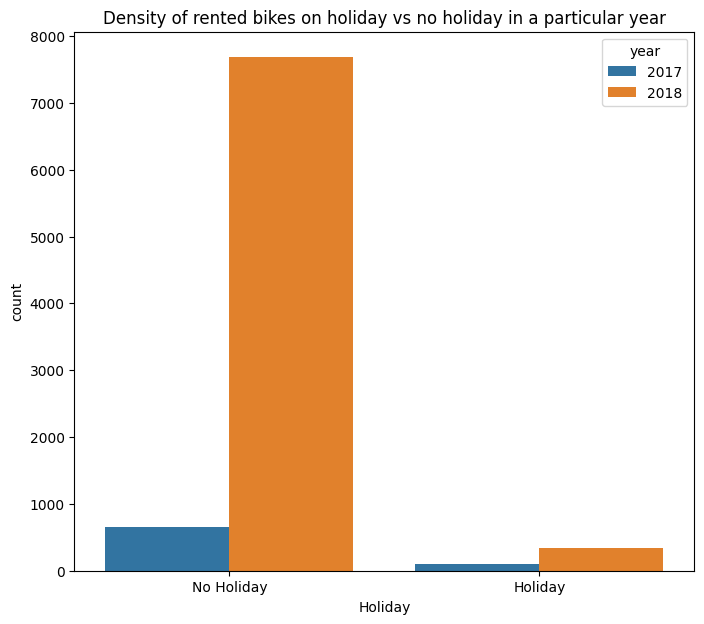

In [214]:
# bikes rented on type of day in each year

plt.figure(figsize=(8,7))
sns.countplot(x='Holiday', hue = 'year', data= df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

Above plot shows that very less bikes have been rented in december which is winter season.

<Axes: ylabel='count'>

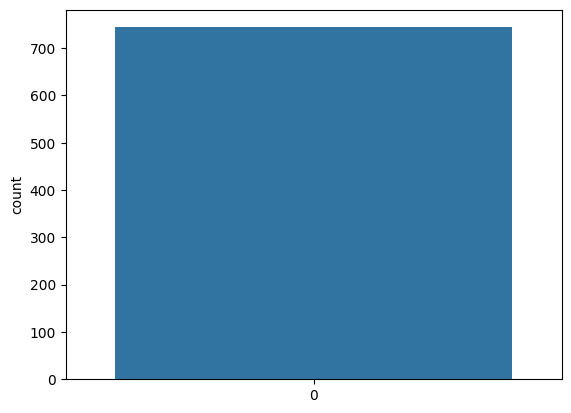

In [215]:
# plot showing the bikes rented in differant months in the year 2017

sns.countplot(df.loc[df['year']==2017,'month'])

Above plot shows that most bikes have been rented in december in the year 2017 as we dont have data before that. 

In [216]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [217]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)

In [218]:
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


<ipython-input-219-97c11607d79d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rain['Rainfall(mm)'])


<Axes: xlabel='Rainfall(mm)', ylabel='Density'>

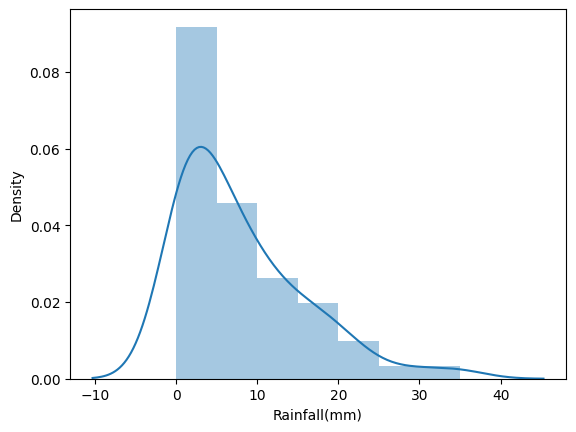

In [219]:
# plot showing distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall(mm)'])

Above plot shows that people tend to rent bikes when there is no or less rainfall.

In [220]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [221]:
df_snow.reset_index(inplace=True)

In [222]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


<ipython-input-223-f193ff7aa66e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_snow['Snowfall (cm)'])


<Axes: xlabel='Snowfall (cm)', ylabel='Density'>

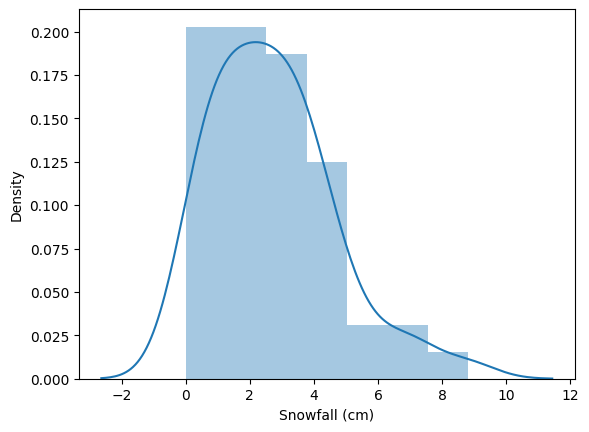

In [223]:
# plot showing distribution of bike rentals according to snowfall intensity

sns.distplot(df_snow['Snowfall (cm)'])

Above plot shows that people tend to rent bikes when there is no or less snowfall.

In [224]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

In [225]:
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


<ipython-input-226-7cd0465efd90>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_temp['Temperature(°C)'])


<Axes: xlabel='Temperature(°C)', ylabel='Density'>

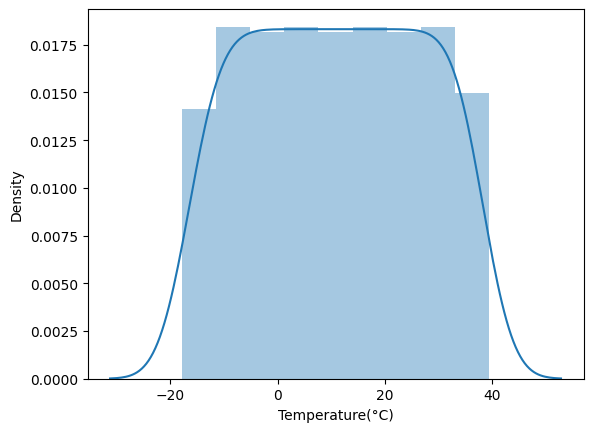

In [226]:
# plot showing distribution of bike rentals according to temperature intensity

sns.distplot(df_temp['Temperature(°C)'])

Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.

In [227]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

In [228]:
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


<ipython-input-229-72369a627aa5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_visi['Visibility (10m)'])


<Axes: xlabel='Visibility (10m)', ylabel='Density'>

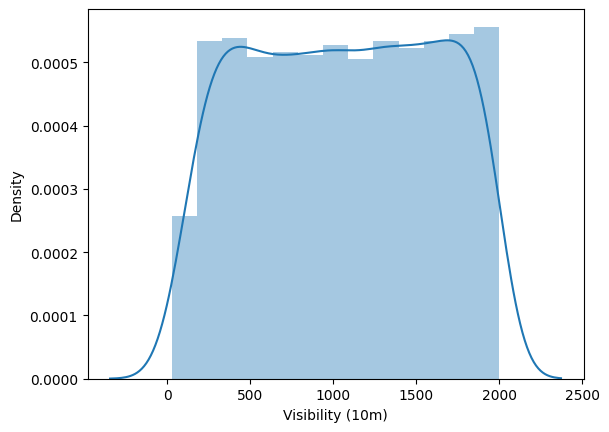

In [229]:
sns.distplot(df_visi['Visibility (10m)'])

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

#Preprocessing the data

In [230]:
# encoding the season names

df['Winter'] = np.where(df['Seasons']=='Winter', 1, 0)
df['Spring'] = np.where(df['Seasons']=='Spring', 1, 0)
df['Summer'] = np.where(df['Seasons']=='Summer', 1, 0)
df['Autumn'] = np.where(df['Seasons']=='Autumn', 1, 0)

df.drop(columns=['Seasons'],axis=1,inplace=True)

In [231]:
# encoding 'Holiday' column with 0 and 1

for i in range(len(df['Holiday'])):
  if df['Holiday'][i] == 'No Holiday':
    df['Holiday'][i] = 0
  else:
    df['Holiday'][i] = 1  

<ipython-input-231-f5c324379a27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i] = 0
<ipython-input-231-f5c324379a27>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][i] = 1


In [232]:
# encoding 'Functioning Day' column with 0 and 1

for i in range(len(df['Functioning Day'])):
  if df['Functioning Day'][i] == 'Yes':
    df['Functioning Day'][i] = 1
  else:
    df['Functioning Day'][i] = 0 

<ipython-input-232-45b79cee2887>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Functioning Day'][i] = 1
<ipython-input-232-45b79cee2887>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Functioning Day'][i] = 0


In [233]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,Winter,Spring,Summer,Autumn
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,1,1,0,0,0


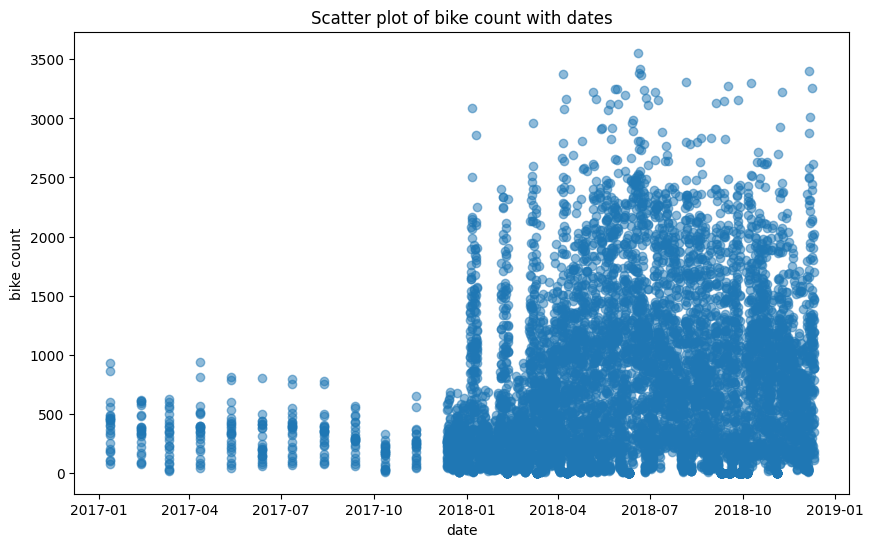

In [234]:
# scatter plot of bike count on differant dates

plt.figure(figsize=(10,6))
plt.scatter(df['Date'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with dates')
plt.xlabel('date')
plt.ylabel('bike count')
plt.show()

Its evident from above plot that rentals increased in year 2018

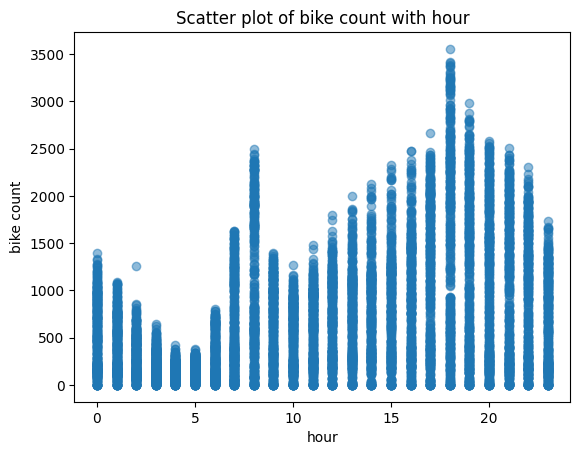

In [235]:
# scatter plot of bike count at hour of a particular day

plt.scatter(df['Hour'], df['Rented Bike Count'], alpha=0.5)
plt.title('Scatter plot of bike count with hour')
plt.xlabel('hour')
plt.ylabel('bike count')
plt.show()

From above its clear that the rentals were more in the morning and evening.This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.

In [236]:
# finding the inter-quartile range 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
month                           6.00
Winter                          0.00
Spring                          1.00
Summer                          1.00
Autumn                          0.00
dtype: float64


<ipython-input-236-6fe62d8c1178>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-236-6fe62d8c1178>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [237]:
# listing features to remove outliers

features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Winter','Spring','Summer','Autumn','Holiday','Functioning Day','month','year']
new_features = [x for x in features if x not in list_0]

In [238]:
new_features 

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [239]:
# removing outliers

df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-239-c5f08b4fac2d>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-239-c5f08b4fac2d>:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Holiday                    8760 non-null   object        
 12  Functi

In [241]:
# filling null values with mean values

df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())
df['Dew point temperature(°C)'] = df['Dew point temperature(°C)'].fillna(df['Dew point temperature(°C)'].mean())
df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

<ipython-input-242-687d46f2f554>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<Axes: >

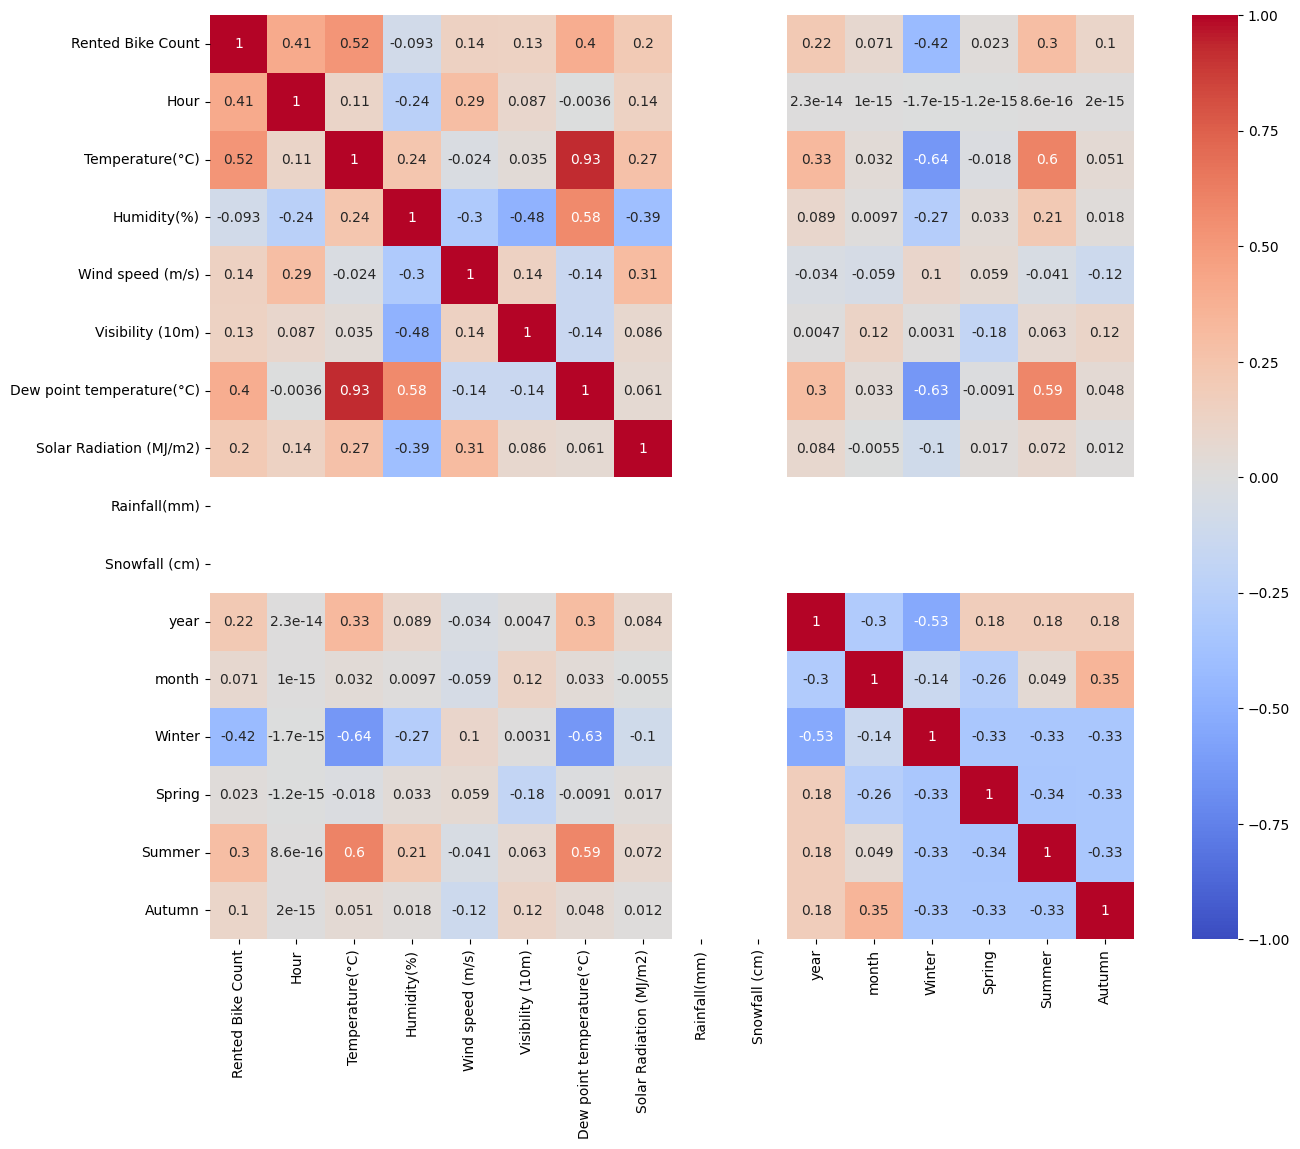

In [242]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [243]:
# dropping columns with more (or less) correlation

df.drop(columns=['Dew point temperature(°C)','Date','Rainfall(mm)','Snowfall (cm)','year'],axis=1,inplace=True)

<ipython-input-244-687d46f2f554>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<Axes: >

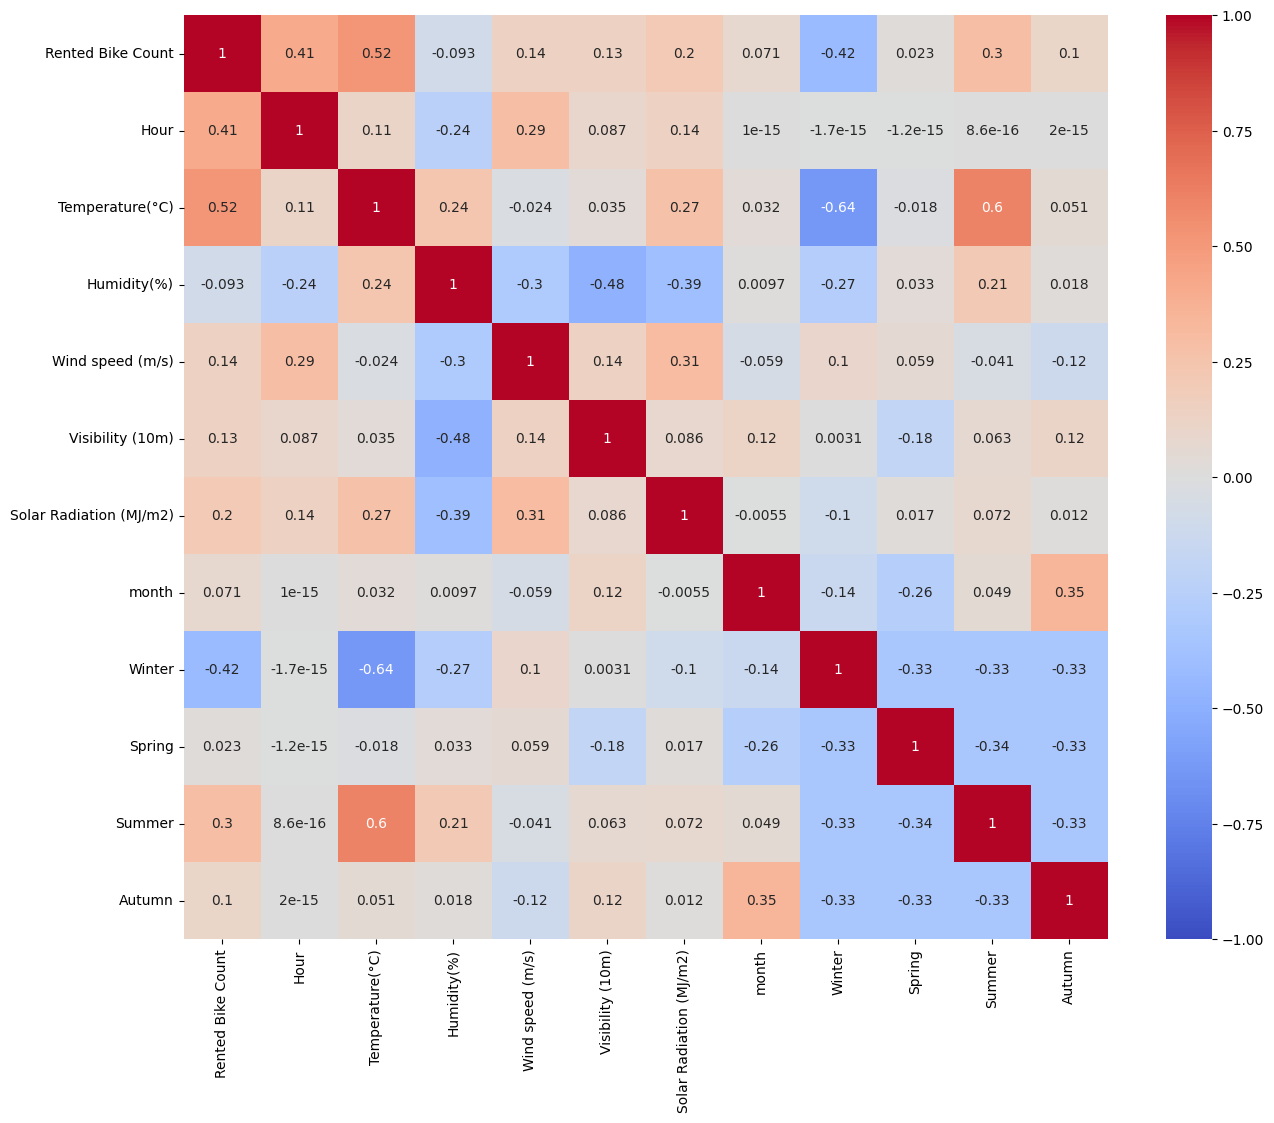

In [244]:
# extracting correlation heatmap

plt.figure(figsize=(15,12))
sns.heatmap(df.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [245]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [246]:
# multicollinearity result

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,1.186328
1,Temperature(°C),2.871155
2,Humidity(%),2.137895
3,Wind speed (m/s),1.264894
4,Visibility (10m),1.503631
5,Solar Radiation (MJ/m2),1.591228
6,month,1.211705
7,Winter,16.509521
8,Spring,17.996409
9,Summer,22.666811


In [247]:
# dropping "summer" column as it adds to multicollinearity

df.drop(columns=['Summer'],axis=1,inplace=True)

In [248]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Date']]])

,variables,VIF
0,Hour,4.232652
1,Temperature(°C),6.982894
2,Humidity(%),10.146646
3,Wind speed (m/s),5.800116
4,Visibility (10m),7.565901
5,Solar Radiation (MJ/m2),2.203240
6,month,5.226156
7,Winter,3.829748
8,Spring,2.343245
9,Autumn,2.386321


In [249]:
# checking types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   float64
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   float64
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Holiday                  8760 non-null   object 
 8   Functioning Day          8760 non-null   object 
 9   month                    8760 non-null   int64  
 10  Winter                   8760 non-null   int64  
 11  Spring                   8760 non-null   int64  
 12  Autumn                   8760 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 889.8+ KB


In [250]:
# converting object type columns to float

df['Functioning Day'] = df['Functioning Day'].astype(float)
df['Holiday'] = df['Holiday'].astype(float)

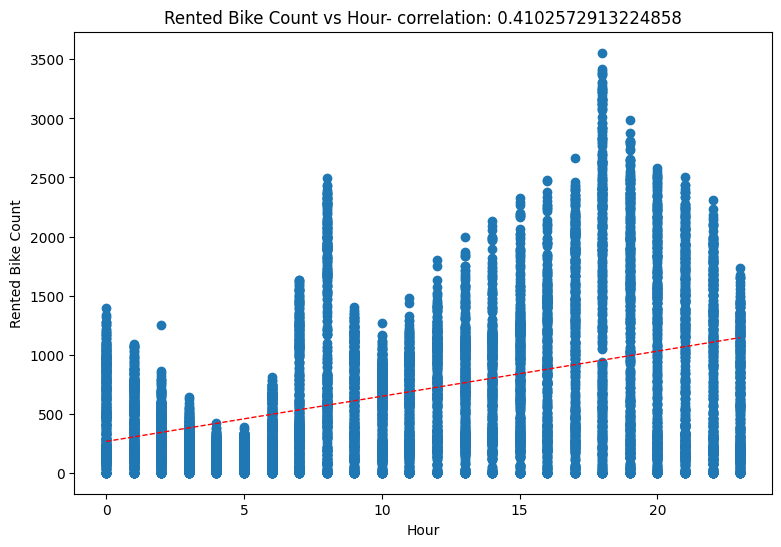

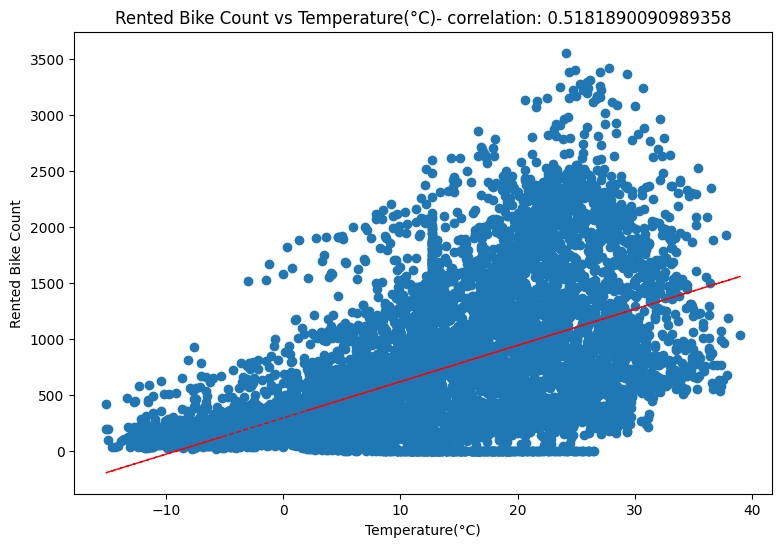

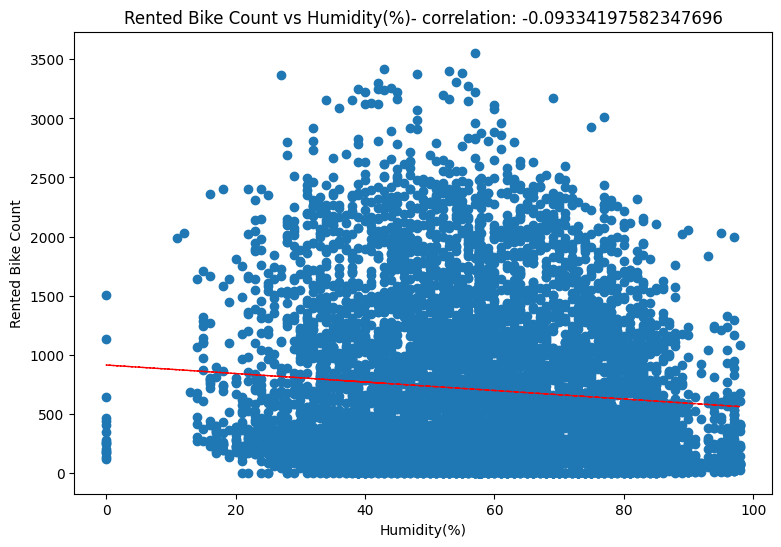

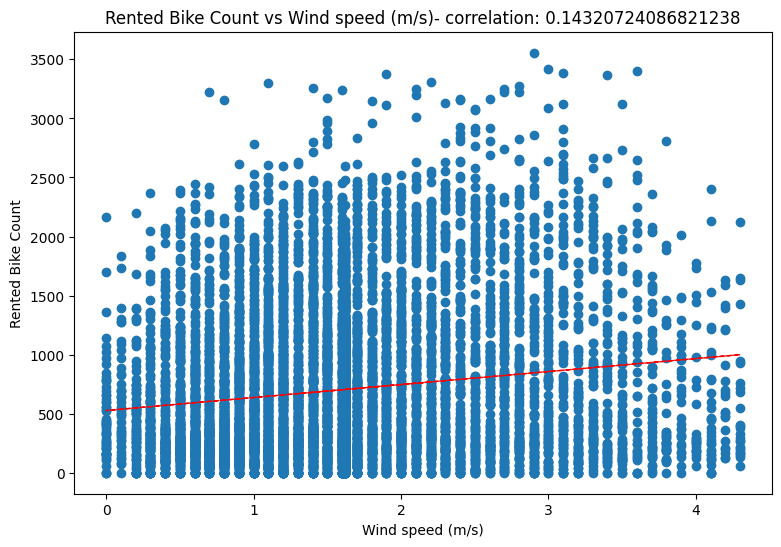

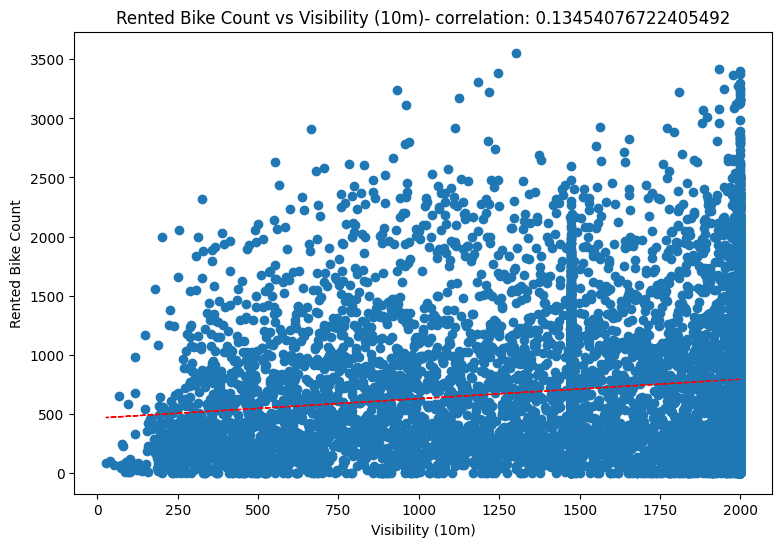

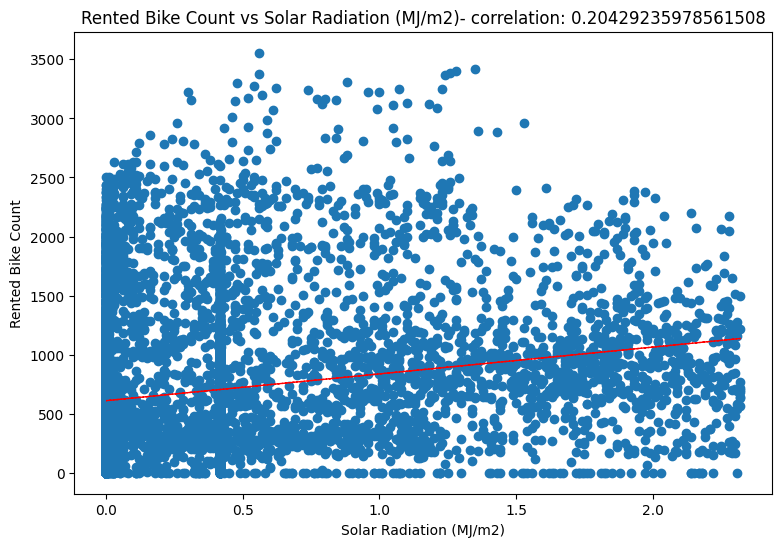

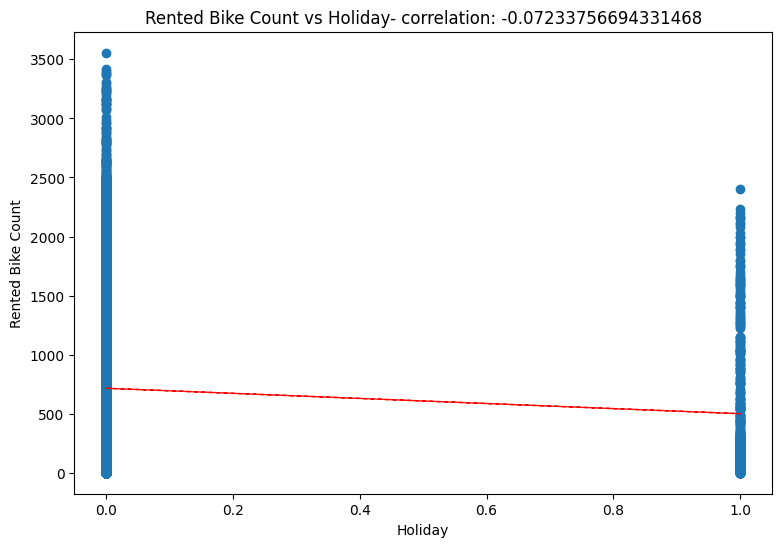

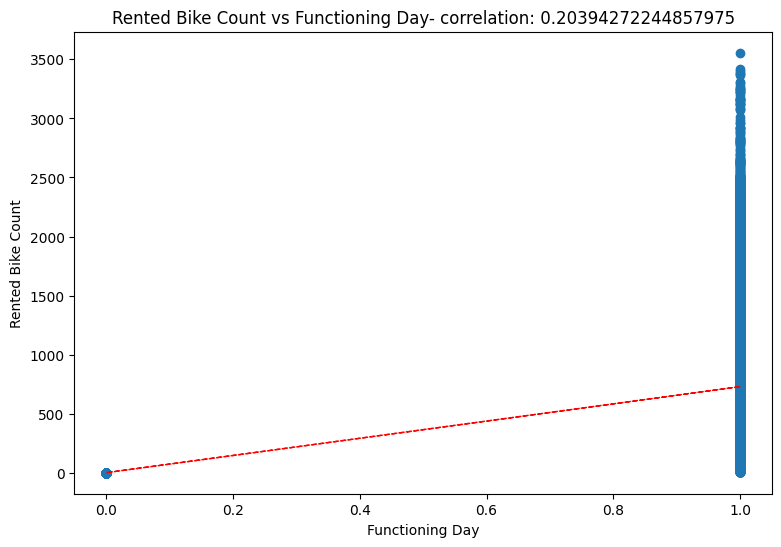

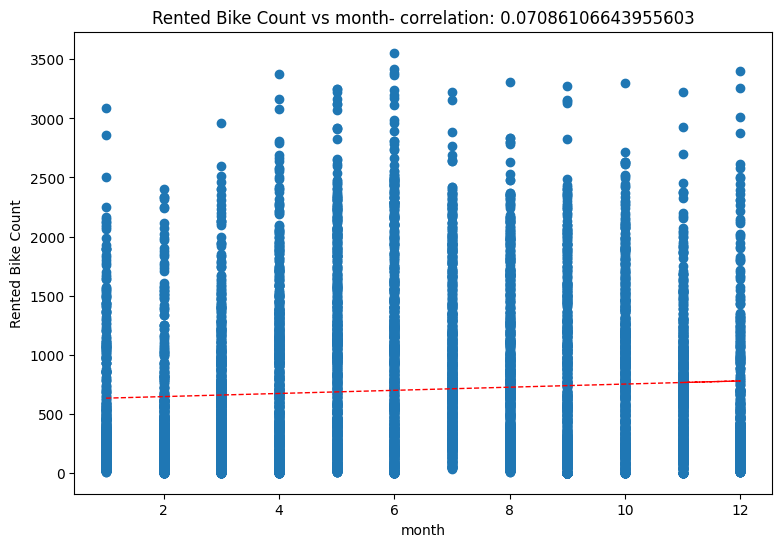

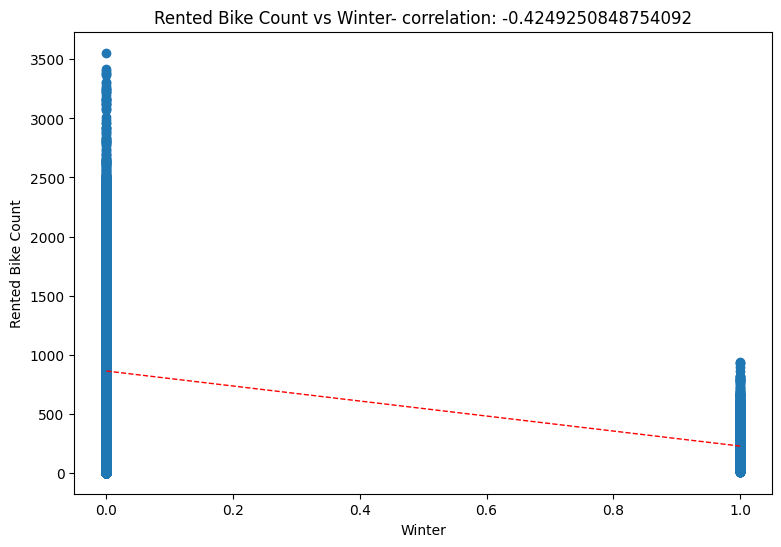

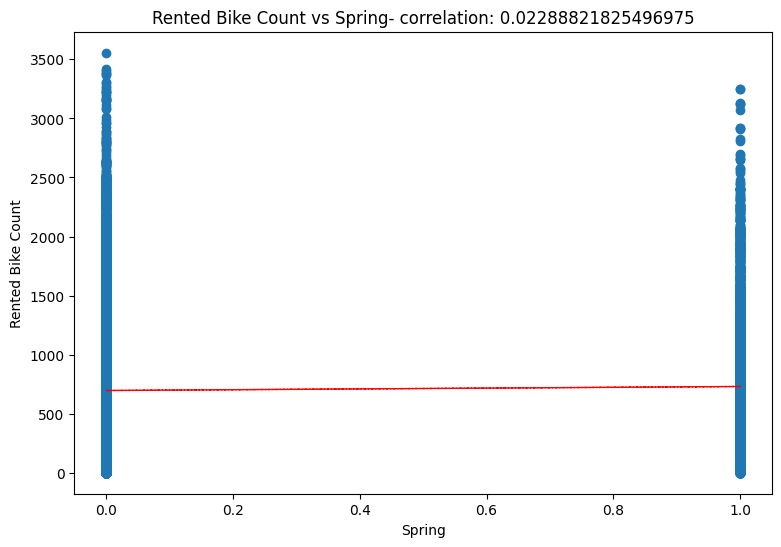

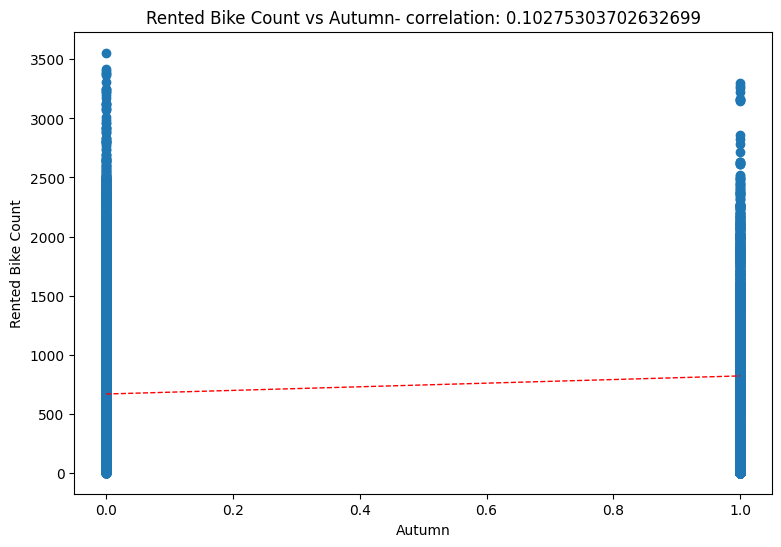

In [251]:
# obtaining correlation plots between dependent and independent variables

numeric_features = df.columns
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

#Models

In [252]:
# Creating the data of independent variables
Y = df['Rented Bike Count']

# Create the dependent variable data
X = df.drop(columns=['Rented Bike Count'],axis=1).values

In [253]:
X

array([[ 0. , -5.2, 37. , ...,  1. ,  0. ,  0. ],
       [ 1. , -5.5, 38. , ...,  1. ,  0. ,  0. ],
       [ 2. , -6. , 39. , ...,  1. ,  0. ,  0. ],
       ...,
       [21. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [22. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [23. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [254]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [255]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Linear regression model

In [256]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [257]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [258]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [259]:
# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [260]:
r2_linear_train

0.50903798357405

In [261]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [262]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 202937.66869256625
RMSE : 450.4860360683406
R2 : 0.5151094008043045
Adjusted R2 :  0.5117634047201478


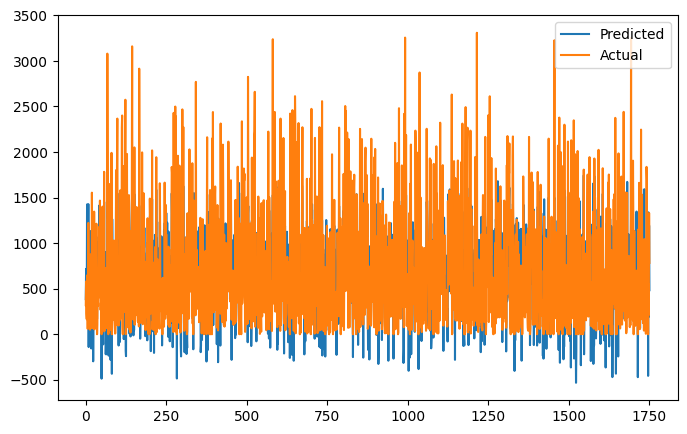

In [263]:
# plotting results from above model

plt.figure(figsize=(8,5))
plt.plot((Y_pred_test))
plt.plot(np.array((Y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso regression model

In [264]:
### Cross validation ###

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [265]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -205096.00188867253


In [266]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [267]:
# different metrics used

MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203516.67879838907
RMSE : 451.1282287757984
R2 : 0.5137259387838644
Adjusted R2 :  0.5103703960957715


##Ridge regression model

In [268]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [269]:
# getting best parameters

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -204891.04307324535


In [270]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [271]:
# evaluating metrics

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 203018.4447646066
RMSE : 450.5756815060114
R2 : 0.5149163979072836
Adjusted R2 :  0.5103703960957715


## Decision-tree regression model

In [272]:
# training model

from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [273]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.775562862836391 with max depth 10


The best R2 test score is : 0.7947584552879962 with max depth = 10


##Random forest regression model

In [274]:
# training model

from sklearn.ensemble import RandomForestRegressor
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [10,15,20],
         'min_samples_split':[2,4],
         'min_samples_leaf':[1,2],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train,Y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test,Y_test)
r2_randomforest_test = best_randomForest.score(X_test,Y_test)

In [275]:
# getting best parameters

print(f"The best Random Forest R2 train score is : {gridSearch_RandomForest.best_score_} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestRandomForest_testScore} with n estimators = {gridSearch_RandomForest.best_params_['n_estimators']}, max depth : {gridSearch_RandomForest.best_params_['max_depth']}, min samples split : {gridSearch_RandomForest.best_params_['min_samples_split']} and min samples leaf : {gridSearch_RandomForest.best_params_['min_samples_leaf']}")

The best Random Forest R2 train score is : 0.8283136445267871 with n estimators = 17, max depth : 15, min samples split : 2 and min samples leaf : 2


The best Random Forest R2 test score is : 0.8396529658911338 with n estimators = 17, max depth : 15, min samples split : 2 and min samples leaf : 2


##Extra-trees regression model

In [276]:
# training model

from sklearn.ensemble import ExtraTreesRegressor
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
         'max_depth' : [50,80,100],
         'min_samples_split':[1,4,8],
         'min_samples_leaf':[1,2,3],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train,Y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test,Y_test)
r2_extratree_test = best_ExtrasTrees.score(X_test,Y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [277]:
# getting best parameters

print(f"The best Random Forest R2 score is : {gridSearch_ExtraTrees.best_score_} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")
print('\n')
print(f"The best Random Forest R2 test score is : {bestExtrasTrees_testScore} with n estimators = {gridSearch_ExtraTrees.best_params_['n_estimators']}, max depth : {gridSearch_ExtraTrees.best_params_['max_depth']}, min samples split : {gridSearch_ExtraTrees.best_params_['min_samples_split']} and min samples leaf : {gridSearch_ExtraTrees.best_params_['min_samples_leaf']}")

The best Random Forest R2 score is : 0.8288853758126272 with n estimators = 20, max depth : 50, min samples split : 8 and min samples leaf : 2


The best Random Forest R2 test score is : 0.853542368236877 with n estimators = 20, max depth : 50, min samples split : 8 and min samples leaf : 2


##Elasticnet regularization model

In [278]:
# training model

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [279]:
elasticnet.score(X_train, Y_train)

0.4315586330057626

In [280]:
Y_pred_en = elasticnet.predict(X_test)

In [281]:
# evaluating metrics

MSE  = mean_squared_error(Y_test, Y_pred_en)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet_test = r2_score(Y_test,Y_pred_en)
print("R2 :" ,r2_elasticnet_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test, Y_pred_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 241812.90765665614
RMSE : 491.7447586468575
R2 : 0.42222256497625543
Adjusted R2 :  0.4182356016523423


##Crossvalidation on elasticnet model

In [282]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regularization.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.543e+08, tolerance: 2.359e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.301e+08, tolerance: 2.299e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.638e+08, tolerance: 2.375e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [283]:
print("The best fit alpha value is found out to be :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -204884.9898260319


In [284]:
Y_pred_elastic = elastic_regularization.predict(X_test)

In [285]:
MSE  = mean_squared_error(Y_test, Y_pred_elastic)
print("MSE :" , MSE)
  
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_cv_test = r2_score(Y_test, Y_pred_elastic)
print("R2 :" ,r2_elastic_cv_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 202976.53833521475
RMSE : 450.52917589787097
R2 : 0.5150165273400739
Adjusted R2 :  0.5116698903809485


#Result

In [286]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree Regressor','Random Forest Regressor','Extra Trees Regressor','Elasticnet regularization','Elasticnet(cv) regressor']

In [287]:
# creating a list of all model r2 score results from above

result_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_decision_test,r2_randomforest_test,r2_extratree_test,r2_elasticnet_test,r2_elastic_cv_test]

In [288]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [289]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [290]:
# dataframe containing results from all the above models used

results_df

,model name,R2-score
0,Linear regression,0.515109
1,Lasso regression,0.513726
2,Ridge regression,0.514916
3,Decision Tree Regressor,0.794758
4,Random Forest Regressor,0.839653
5,Extra Trees Regressor,0.853542
6,Elasticnet regularization,0.422223
7,Elasticnet(cv) regressor,0.515017


#Conclusion

1. From above its clear that extratrees regression model is the best model for this dataset.
2. Elasticnet regularization performed very poorly.
3. Preprocessing the data was one of the difficult challenges we faced.
4. We were able to get relevant information from the dataset using exploratory data analysis.